# OkCupid Project
## Exploratory Analysis
First, we import our libraries and tools to be used in exploring the data.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We want to load the data and check out the columns and rows.

In [35]:
df = pd.read_csv('profiles.csv')

In [36]:
df.head(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


In [37]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In this analysis, we will be taking a look at body_type, drinks, drugs, and income.  
Let's take a look at the distribution of these columns.

In [38]:
df.body_type.value_counts()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

In [39]:
df.drinks.value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [40]:
df.drugs.value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

In [41]:
df.income.describe()

count      59946.000000
mean       20033.222534
std        97346.192104
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64

It appears that some of the responses for income were submitted as -1. We are going to assume these are null values.  
## Data Cleaning  
Let's remove the submissions that have a value of -1 for income.

In [42]:
df['valid_income'] = df[df.income != -1]['income']
df['valid_income'].describe()

count      11504.000000
mean      104394.993046
std       201433.528307
min        20000.000000
25%        20000.000000
50%        50000.000000
75%       100000.000000
max      1000000.000000
Name: valid_income, dtype: float64

In [43]:
df[['valid_income', 'drugs', 'drinks', 'body_type']].count()

valid_income    11504
drugs           45866
drinks          56961
body_type       54650
dtype: int64

Unfortunately, we only have 11504 entries with valid income submissions and will end up losing ~ 40,000 entries of data.  
We want to make this tradeoff because we are mostly interested in the relationship between income and the remaining features.

In [44]:
df.dropna(subset=['valid_income', 'drugs', 'drinks', 'body_type'], inplace=True)
df[['valid_income', 'drugs', 'drinks', 'body_type']].count()

valid_income    9128
drugs           9128
drinks          9128
body_type       9128
dtype: int64

## Visualizing Distribution

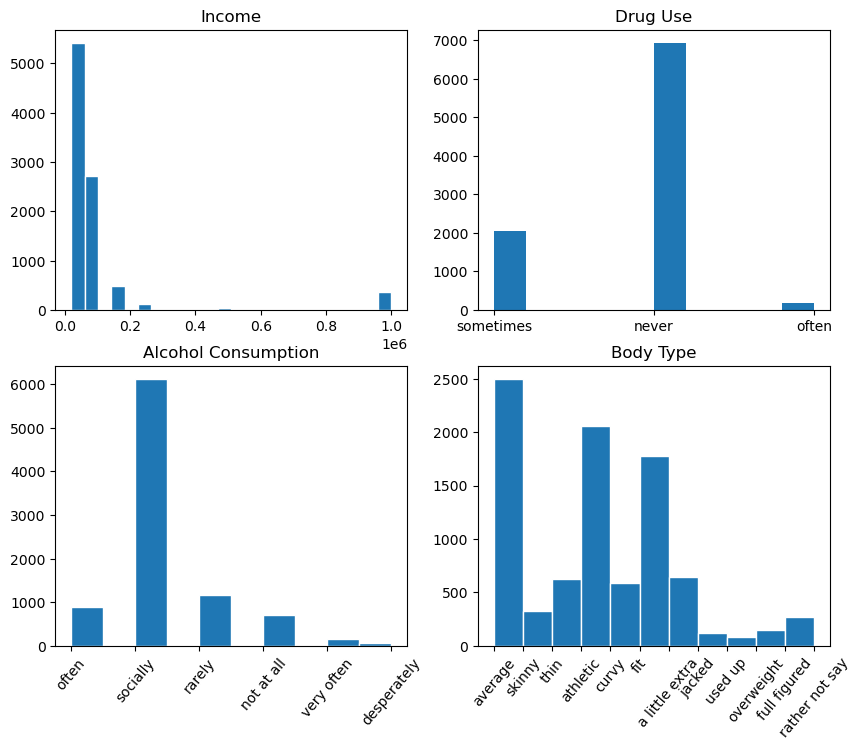

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(10,8))

ax[0,0].hist(df.valid_income, bins=24, edgecolor="white")
ax[0,0].set_title('Income')

ax[0,1].hist(df.drugs)
ax[0,1].set_title('Drug Use')

ax[1,0].hist(df.drinks, edgecolor="white")
ax[1,0].set_title('Alcohol Consumption')
ax[1,0].tick_params(axis='x', labelrotation=50)

ax[1,1].hist(df.body_type, bins=11, edgecolor="white")
ax[1,1].set_title('Body Type')
ax[1,1].tick_params(axis='x', labelrotation=50)

plt.show()

Since this data was taken from dating profiles, we are going to remove the outliers from the income column that were well above the average to avoid the submissions that were potentially dishonestly self-reported.

In [46]:
df = df[df['valid_income'] < 300000]
df[['valid_income', 'drugs', 'drinks', 'body_type']].count()

valid_income    8728
drugs           8728
drinks          8728
body_type       8728
dtype: int64

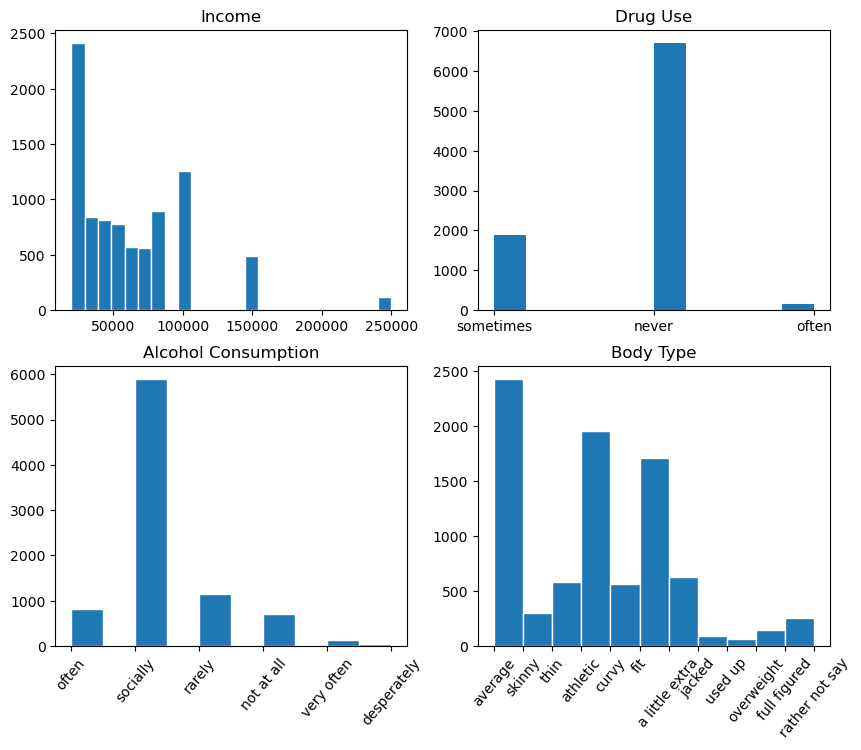

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(10,8))

ax[0,0].hist(df.valid_income, bins=24, edgecolor="white")
ax[0,0].set_title('Income')

ax[0,1].hist(df.drugs)
ax[0,1].set_title('Drug Use')

ax[1,0].hist(df.drinks, edgecolor="white")
ax[1,0].set_title('Alcohol Consumption')
ax[1,0].tick_params(axis='x', labelrotation=50)

ax[1,1].hist(df.body_type, bins=11, edgecolor="white")
ax[1,1].set_title('Body Type')
ax[1,1].tick_params(axis='x', labelrotation=50)

plt.show()

## Graphing the Average Income Versus the Features

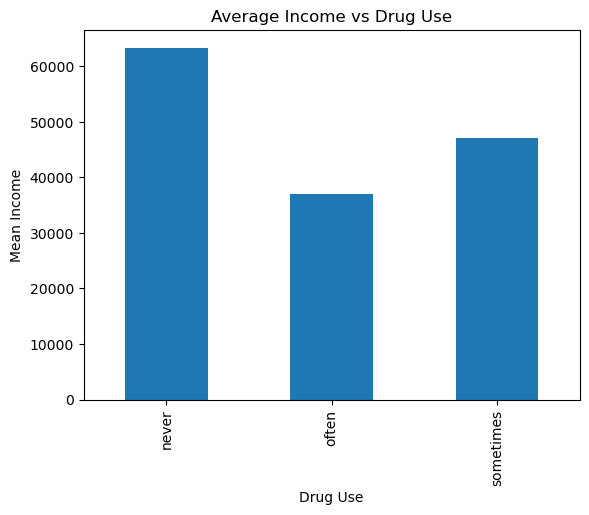

In [48]:
mean_y_per_cat = df.groupby('drugs')['valid_income'].mean()
mean_y_per_cat.plot(kind='bar')
plt.xlabel('Drug Use')
plt.ylabel('Mean Income')
plt.title('Average Income vs Drug Use')
plt.show()

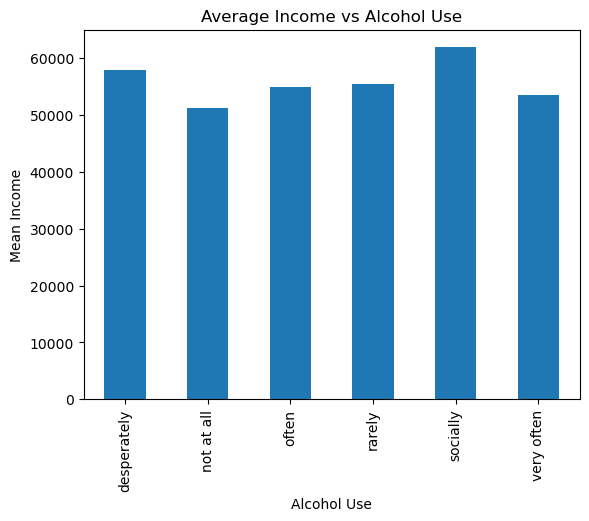

In [49]:
mean_y_per_cat = df.groupby('drinks')['valid_income'].mean()
mean_y_per_cat.plot(kind='bar')
plt.xlabel('Alcohol Use')
plt.ylabel('Mean Income')
plt.title('Average Income vs Alcohol Use')
plt.show()

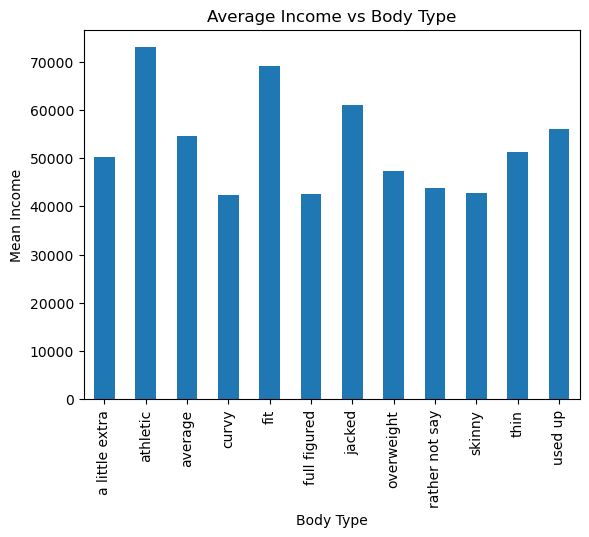

In [50]:
mean_y_per_cat = df.groupby('body_type')['valid_income'].mean()
mean_y_per_cat.plot(kind='bar')
plt.xlabel('Body Type')
plt.ylabel('Mean Income')
plt.title('Average Income vs Body Type')
plt.show()

## Creating Our Model
Here, we import tools from sci-kit learn to create a linear regression model.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [52]:
x = df[['drugs', 'drinks', 'body_type']]
y = df['valid_income']

#Convert x categorical features into readable dummy variables using pd.get_dummies
x = pd.get_dummies(x, drop_first=True)

#Train the data to the linear regression model
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=9)

In [53]:
#Fit the data to the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [54]:
print("Train score:")
print(model.score(x_train, y_train))

print("Test score:")
print(model.score(x_test, y_test))

Train score:
0.09388227099801494
Test score:
0.09381881631446276


## Coefficient Analysis

In [55]:
print(sorted(model.coef_))

[-23330.946358010657, -22270.889626236705, -17969.183412041424, -16099.642966880663, -11485.188561069639, -10614.027928477666, -9573.476058049871, -9054.569759975653, -7866.313051733649, -7152.019917139674, -5814.920173026084, -900.4484951957688, 1472.6906124413474, 4605.003397332217, 9307.505336710194, 13469.284266703042, 18292.778740347887, 21469.880155858362]


### Strongest Features:
**drugs_often** (-23330) highest relationship with the dependent variable  
**drinks_not at all** (-22271)  
**body_type_athletic** (21470)  
  
### Weakest Features:
**body_type_overweight** (-900) lowest relationship with the dependent variable  
**body_type_thin** (1473)  
**body_type_average** (4605)

In [56]:
x_train_con = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_con).fit()
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:           valid_income   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     40.08
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.90e-134
Time:                        18:44:04   Log-Likelihood:                -83941.
No. Observations:                6982   AIC:                         1.679e+05
Df Residuals:                    6963   BIC:                         1.680e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

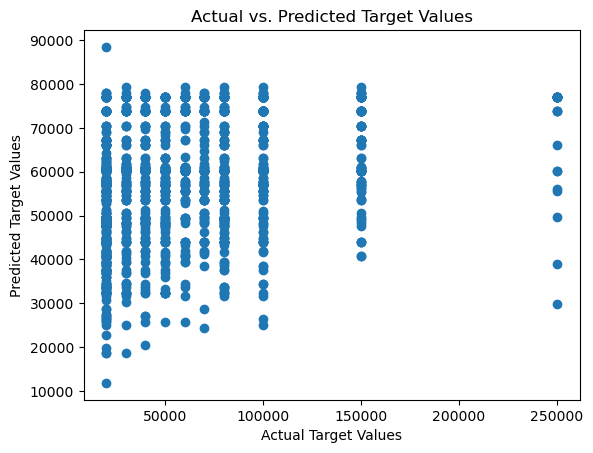

In [57]:
y_pred = model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs. Predicted Target Values')
plt.show()